## dataset download & spark setting

In [1]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

import os

ref_path = os.getcwd()
data_path = ref_path + '/data/'
# if 'kdd.ics.uci.edu' not in os.listdir(ref_path):
#     !wget -A.gz https://kdd.ics.uci.edu/databases/kddcup99/
#     !wget https://kdd.ics.uci.edu/databases/kddcup99/kddcup.names
#     !gunzip $ref_path'kdd.ics.uci.edu/databases/kddcup99/*'
    
    
spark = SparkSession.builder.appName('Chapter05')\
    .master('local[4]')\
    .config("spark.executor.memory", "2g")\
    .getOrCreate()
#Q: Local means CPU or core?


In [2]:
!head $data_path'kddcup.data'

0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1,1,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,2,2,1.00,0.00,0.50,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.00,0.00,0.00,0.00,1.00,0.00,0.00,3,3,1.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.00,0.00,0.00,0.00,1.00,0.00,0.00,4,4,1.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,238,1282,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.00,0.00,0.00,0.00,1.00,0.00,0.00,5,5,1.00,0.00,0.20,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.00,0.00,0.00,0.00,1.00,0.00,0.00,6,6,1.00,0.00,0.17,0.00,0.00,0

In [2]:
dataWithoutHeader = spark\
    .read.format("csv")\
    .option('inferSchema',True)\
    .option("header", False)\
    .option("sep", ",")\
    .load(data_path + "kddcup.data")


In [3]:
cols = []

name = open(data_path + 'kddcup.names.txt','r')
lines = name.readlines()
print(lines)
for line in lines[1:]:
    cols.append(line.split(':')[0])

cols.append('label')

['back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.\n', 'duration: continuous.\n', 'protocol_type: symbolic.\n', 'service: symbolic.\n', 'flag: symbolic.\n', 'src_bytes: continuous.\n', 'dst_bytes: continuous.\n', 'land: symbolic.\n', 'wrong_fragment: continuous.\n', 'urgent: continuous.\n', 'hot: continuous.\n', 'num_failed_logins: continuous.\n', 'logged_in: symbolic.\n', 'num_compromised: continuous.\n', 'root_shell: continuous.\n', 'su_attempted: continuous.\n', 'num_root: continuous.\n', 'num_file_creations: continuous.\n', 'num_shells: continuous.\n', 'num_access_files: continuous.\n', 'num_outbound_cmds: continuous.\n', 'is_host_login: symbolic.\n', 'is_guest_login: symbolic.\n', 'count: continuous.\n', 'srv_count: continuous.\n', 'serror_rate: continuous.\n', 'srv_serror_rate: continuous.\n', 'rerror_rate: continuous.\n', 'srv_rerror_rate: continu

In [4]:
data = dataWithoutHeader.toDF(*cols)
data.cache()

DataFrame[duration: int, protocol_type: string, service: string, flag: string, src_bytes: int, dst_bytes: int, land: int, wrong_fragment: int, urgent: int, hot: int, num_failed_logins: int, logged_in: int, num_compromised: int, root_shell: int, su_attempted: int, num_root: int, num_file_creations: int, num_shells: int, num_access_files: int, num_outbound_cmds: int, is_host_login: int, is_guest_login: int, count: int, srv_count: int, serror_rate: double, srv_serror_rate: double, rerror_rate: double, srv_rerror_rate: double, same_srv_rate: double, diff_srv_rate: double, srv_diff_host_rate: double, dst_host_count: int, dst_host_srv_count: int, dst_host_same_srv_rate: double, dst_host_diff_srv_rate: double, dst_host_same_src_port_rate: double, dst_host_srv_diff_host_rate: double, dst_host_serror_rate: double, dst_host_srv_serror_rate: double, dst_host_rerror_rate: double, dst_host_srv_rerror_rate: double, label: string]

In [6]:
data.groupBy("label").count().orderBy('count',ascending=False).show()

+----------------+-------+
|           label|  count|
+----------------+-------+
|          smurf.|2807886|
|        neptune.|1072017|
|         normal.| 972781|
|          satan.|  15892|
|        ipsweep.|  12481|
|      portsweep.|  10413|
|           nmap.|   2316|
|           back.|   2203|
|    warezclient.|   1020|
|       teardrop.|    979|
|            pod.|    264|
|   guess_passwd.|     53|
|buffer_overflow.|     30|
|           land.|     21|
|    warezmaster.|     20|
|           imap.|     12|
|        rootkit.|     10|
|     loadmodule.|      9|
|      ftp_write.|      8|
|       multihop.|      7|
+----------------+-------+
only showing top 20 rows



In [5]:
import numpy as np
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans,BisectingKMeans
from pyspark.ml import Pipeline
import pyspark.sql.functions as f
from pyspark.ml.evaluation import ClusteringEvaluator

numericOnly = data.drop("protocol_type","service","flag").cache()

InputCols =[columns for columns in numericOnly.columns if columns != 'label']


assembler = VectorAssembler()\
    .setInputCols(InputCols)\
    .setOutputCol("featureVector")

kmeans = BisectingKMeans()\
    .setK(2)\
    .setPredictionCol("cluster")\
    .setFeaturesCol("featureVector")

pipeline = Pipeline(stages=[assembler,kmeans])
piplelinemodel = pipeline.fit(numericOnly)
result_data = piplelinemodel.transform(numericOnly)

---

## pipeline 
- Pipeline은 stage의 연속, stage는 Transformer와 Estimator로 구성. 
- pipeline은 estimator로 fit함수 호출을 통해 학습을 진행할 수 있고 결과로 pipelinemodel을 반환한다. 

## transformer 
- feature를 변형, 추출하기 위한 알고리즘과 학습된 모델을 위한 추상 클래스 또는 구현한 클래스 집합이다.
- transformer클래스들은 내부적으로 transform함수가 구현되어 있다.
- DataFrame을 입력받아 하나 이상의 칼럼이 추가된 새로운 DataFrame을 만들어낸다


## Estimators

- 데이터로 알고리즘을 학습하는 과정을 추상화한 클래스 또는 구현한 클래스 집합이다.
- estimator클래스들은 내부적으로 fit함수가 구현되어있다
- DataFrame을 입력받아 Transformer인 모델을 반환한다.
> ex: estimator class인 LogisticRegression은 fit함수 호출을 통해 학습된 LogisticRegressionModel을 반환하며 반환되는 LogisticRegressionModel은 Transformer이다. 

https://spark.apache.org/docs/latest/ml-pipeline.html#properties-of-pipeline-components

---

## Silhouette score
$$ -1 \leq \frac{ (b_{i}-a_{i})}{max(a_{i},b_{i})} \leq 1 $$

## Intra-cluster distance  
$$a(i) = \frac{1}{C_{i}-1} \sum_{j \subset C_{i}, i \neq j} d(i,j)$$ 

## mean nearest-cluster distance
$$ b(i) = \min_{k \neq i} \frac{1}{C_{k}} \sum_{j \subset C_{k}} d(i,j)$$

$$ d(i,j): distance \; i,j, $$
$$ C_{i}: number \; of \; object \; in \; Cluster \; i$$

<br/>

**Mean Silhouette Coefficient for all samples.**



Range of SC Interpretation  
0.71-1.0 A strong structure has been found  
0.51-0.70 A reasonable structure has been found  
0.26-0.50 The structure is weak and could be artificial  
< 0.25 No substantial structure has been found  
https://www.stat.berkeley.edu/~spector/s133/Clus.html

<br/>
<br/>

Kmeans는 모든 iteration step마다 distance를 계산하여 clustering,  
Bisecting clustering은 가장 Intra-cluster distance가 높은 cluster를 픽 하여 나눈다. 

---

### Bisecting clustering computeCost deprecated in 3.0.0.  use ClusteringEvaluator

---


In [11]:
result_data.select("label", "featureVector").show(5, False)

+-------+---------------------------------------------------------------------------------+
|label  |featureVector                                                                    |
+-------+---------------------------------------------------------------------------------+
|normal.|(38,[1,2,8,19,20,25],[215.0,45076.0,1.0,1.0,1.0,1.0])                            |
|normal.|(38,[1,2,8,19,20,25,28,29,30,32],[162.0,4528.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0]) |
|normal.|(38,[1,2,8,19,20,25,28,29,30,32],[236.0,1228.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,0.5]) |
|normal.|(38,[1,2,8,19,20,25,28,29,30,32],[233.0,2032.0,1.0,2.0,2.0,1.0,3.0,3.0,1.0,0.33])|
|normal.|(38,[1,2,8,19,20,25,28,29,30,32],[239.0,486.0,1.0,3.0,3.0,1.0,4.0,4.0,1.0,0.25]) |
+-------+---------------------------------------------------------------------------------+
only showing top 5 rows



In [12]:
result_data.select("cluster","label")\
    .groupBy("Cluster","label").count()\
    .orderBy('count',ascending=False)\
    .show(25)

+-------+----------------+-------+
|Cluster|           label|  count|
+-------+----------------+-------+
|      0|          smurf.|2807886|
|      0|        neptune.|1072017|
|      0|         normal.| 972781|
|      0|          satan.|  15892|
|      0|        ipsweep.|  12481|
|      0|      portsweep.|  10408|
|      0|           nmap.|   2316|
|      0|           back.|   2203|
|      0|    warezclient.|   1020|
|      0|       teardrop.|    979|
|      0|            pod.|    264|
|      0|   guess_passwd.|     53|
|      0|buffer_overflow.|     30|
|      0|           land.|     21|
|      0|    warezmaster.|     20|
|      0|           imap.|     12|
|      0|        rootkit.|     10|
|      0|     loadmodule.|      9|
|      0|      ftp_write.|      8|
|      0|       multihop.|      7|
|      1|      portsweep.|      5|
|      0|            phf.|      4|
|      0|           perl.|      3|
|      0|            spy.|      2|
+-------+----------------+-------+



In [5]:
import numpy as np
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans,BisectingKMeans
from pyspark.ml import Pipeline
import pyspark.sql.functions as f
from pyspark.ml.evaluation import ClusteringEvaluator
numericOnly = data.drop("protocol_type","service","flag").cache()

InputCols =[columns for columns in numericOnly.columns if columns != 'label']

cost = []
for k in [5,10,15,20]:

#for k in [20]:

    assembler = VectorAssembler()\
        .setInputCols(InputCols)\
        .setOutputCol("features")

    kmeans = KMeans()\
        .setSeed(np.random.randint(42))\
        .setK(k)\
        .setPredictionCol("cluster")\
        .setFeaturesCol("features")

 #init='k-means++'

    pipeline = Pipeline().setStages([assembler,kmeans])
    pipelinemodel = pipeline.fit(numericOnly)
    result_data = pipelinemodel.transform(numericOnly)

    evaluator = ClusteringEvaluator()
    evaluator.setPredictionCol("cluster")
    cost.append(evaluator.evaluate(result_data))
    print(k,(evaluator.evaluate(result_data)))
    #print(k, evaluator.evaluate(result_data)) #자동으로 "features" 만 찾아줌 

5 0.9999994341550521
10 0.99996839424901
15 0.9999231883576829
20 0.999933043370616


Text(0.5, 1.0, 'Bisection ')

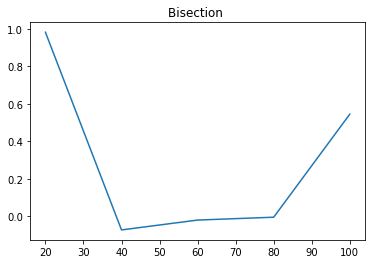

In [8]:
import matplotlib.pyplot as plt
plt.plot([20,40,60,80,100],cost)
plt.title("Bisection ")

In [32]:
piplelinemodel.explainParams()

''

In [5]:
import numpy as np
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans,BisectingKMeans
from pyspark.ml import Pipeline
import pyspark.sql.functions as f
from pyspark.ml.evaluation import ClusteringEvaluator
numericOnly = data.drop("protocol_type","service","flag").cache()

InputCols =[columns for columns in numericOnly.columns if columns != 'label']

for k in [20]:

#for k in [20]:

    assembler = VectorAssembler()\
        .setInputCols(InputCols)\
        .setOutputCol("features")

    kmeans = KMeans()\
        .setSeed(np.random.randint(42))\
        .setK(k)\
        .setPredictionCol("cluster")\
        .setFeaturesCol("features")

 #init='k-means++'

    pipeline = Pipeline().setStages([assembler,kmeans])
    pipelinemodel = pipeline.fit(numericOnly)
    result_data = pipelinemodel.transform(numericOnly)

    evaluator = ClusteringEvaluator()
    evaluator.setPredictionCol("cluster")
    cost.append(evaluator.evaluate(result_data))
    print(k,(evaluator.evaluate(result_data)))

NameError: name 'cost' is not defined

In [7]:
result_data.groupBy("cluster","label").count().orderBy("count",ascending=False).show(20)

+-------+----------------+-------+
|cluster|           label|  count|
+-------+----------------+-------+
|      0|          smurf.|2807886|
|      0|        neptune.|1072017|
|      0|         normal.| 972335|
|      0|          satan.|  15892|
|      0|        ipsweep.|  12481|
|      0|      portsweep.|  10402|
|      0|           nmap.|   2316|
|      0|           back.|   2203|
|      0|       teardrop.|    979|
|      0|    warezclient.|    960|
|      0|            pod.|    264|
|     13|         normal.|    243|
|     12|         normal.|    187|
|      9|    warezclient.|     59|
|      0|   guess_passwd.|     53|
|      0|buffer_overflow.|     30|
|      0|           land.|     21|
|     12|    warezmaster.|     16|
|      0|           imap.|     12|
|      0|        rootkit.|     10|
+-------+----------------+-------+
only showing top 20 rows



In [ ]:
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder, StandardScaler, PCA
